# Saudi Arabia Used Cars


### **Contents**

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

### **1**. **Business Problem Understanding**

**Context**

Mobil adalah salah satu kendaraan yang paling banyak dan luas digunakan diseluruh dunia. Tidak terkecuali pada negara Arab Saudi, dimana mobil menjadi kendaraan yang paling banyak digunakan masyarakatnya. Selain menjadi alat transportasi pribadi yang paling diandalkan, mobil menjadi komoditas ekonomi yang bernilai besar. Platform syarah.com menjadi salah satu platform yang berhasil memanfaatkan potensi ekonomi ini dengan menyediakan jual beli mobil di Arab Saudi. Didalam platform ini diakomodasi semua jenis mobil dari seluruh kota di Arab Saudi. Dengan kondisi seperti ini, setiap pemilik mobil di negara Arab Saudi dapat dengan mudah menjual mobilnya melalui syarah.com dan sebaliknya calon pembeli dari seluruh Arab Saudi dapat dengan mudah membeli mobil sesuai dengan keinginan dan kebutuhan. Sebagai platform penyedia jual beli mobil bekas terbesar di Arab Saudi, syarah.com memberikan kesempatan kepada pemilik mobil untuk menentukan harga jual mobilnya. Hal ini disatu sisi menjadi kemudahan bertransaksi, namun dapat sekaligus menjadi pembuat kondisi yang tidak baik dalam penentuan harga di syarah.com. Selain inspeksi yang dilakukan secara langsung, penilaian berdasarkan data mengenai mobil dapat menjadi acuan dalam penentuan harga.

<br>

**Problem Statement**

Dalam data yang diperoleh terdapat data dimana harga mobil bernilai 0 karena harga dapat dinegoisasikan (ditawar). Kondisi ini dapat menjadi masalah karena dapat terbentuk harga yang terlalu rendah atau terlalu tinggi. Syarah.com dalam hal ini perlu menentukan harga dasar yang dapat menjadi acuan berdasarkan data dari mobil yang dijual. Hal ini sangat penting agar platform syarah.com terus dapat menjadi platform penyedia jual-beli mobil bekas nomor satu di Arab Saudi yang mampu memberikan keuntungan maksimal bagi penjual mobil dan kepuasan maksimal bagi pembeli mobil.

<br>

**Goals**

Seperti yang telah dijelaskan sebelumnya, penentuan harga menjadi amat penting dalam jual-beli mobil bekas. Kondisi yang begitu dinamis dalam jual-beli mobil di syarah.com memerlukan sebuah model yang dapat memprediksikan harga yang paling relevan pada penjualan mobil. Model prediksi ini akan didasarkan pada data mengenai mobil seperti tipe mobil, tahun pembuatan, dan ukuran mesin. Dengan prediksi harga yang dapat diandalkan ini diharapkan dapat terus meningkatkan penggunaan plaform dan transaksi jual beli mobil di platform syarah.com.

<br>

**Analytic Approach**

Analisis data akan menjadi langkah pertama untuk dapat menemukan pola dari data mengenai masing-masing mobil. Dengan pengenalan dan pemahaman mengenai data, akan diperoleh data training yang memang bisa diandalkan. Selanjutnya, setelah data train siap, akan dibangun suatu model regresi. Model regresi ini yang akan membantu untuk dapat menyediakan 'tool' prediksi harga jual mobil bekas dalam platform syarah.com.

<br>

**Metric Evaluation**

Evaluasi metrik yang akan digunakan adalah RMSE, MAE, dan MAPE, di mana RMSE adalah nilai rataan akar kuadrat dari error, MAE adalah rataan nilai absolut dari error, sedangkan MAPE adalah rataan persentase error yang dihasilkan oleh model regresi. Semakin kecil nilai RMSE, MAE, dan MAPE yang dihasilkan, berarti model semakin akurat dalam memprediksi harga sewa sesuai dengan limitasi fitur yang digunakan. 

Selain itu, akan digunakan nilai R-squared atau adj. R-squared untuk model terpilih. Sebagai final model linear, nilai adjusted R-squared ini akan digunakan untuk mengetahui seberapa baik model dapat merepresentasikan varians keseluruhan data.


### **2. Data Understanding** ###

In [340]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [341]:
#Load data
used_car_saudi = pd.read_csv('data_saudi_used_cars.csv')
used_car_saudi

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,True,0
...,...,...,...,...,...,...,...,...,...,...,...
5619,X-Trail,Jeddah,Nissan,Automatic,Saudi,Standard,2018,2.5,78794,False,68000
5620,Altima,Jeddah,Nissan,Automatic,Saudi,Semi Full,2020,2.5,58000,True,0
5621,Yukon,Dammam,GMC,Automatic,Saudi,Full,2016,5.3,48000,False,145000
5622,RX,Dammam,Lexus,Automatic,Gulf Arabic,Full,2016,2.5,81000,False,154000


In [342]:
# Showing data type
used_car_saudi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5624 entries, 0 to 5623
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         5624 non-null   object 
 1   Region       5624 non-null   object 
 2   Make         5624 non-null   object 
 3   Gear_Type    5624 non-null   object 
 4   Origin       5624 non-null   object 
 5   Options      5624 non-null   object 
 6   Year         5624 non-null   int64  
 7   Engine_Size  5624 non-null   float64
 8   Mileage      5624 non-null   int64  
 9   Negotiable   5624 non-null   bool   
 10  Price        5624 non-null   int64  
dtypes: bool(1), float64(1), int64(3), object(6)
memory usage: 445.0+ KB


In [343]:
used_car_saudi.describe() # Menunjukan statistik data numerik

,Year,Engine_Size,Mileage,Price
count,5624.000000,5624.000000,5.624000e+03,5624.000000
mean,2014.101885,3.295430,1.509234e+05,53074.058144
std,5.791606,1.515108,3.828360e+05,70155.340614
min,1963.000000,1.000000,1.000000e+02,0.000000
25%,2012.000000,2.000000,3.800000e+04,0.000000
50%,2016.000000,3.000000,1.030000e+05,36500.000000
75%,2018.000000,4.500000,1.960000e+05,72932.500000
max,2022.000000,9.000000,2.000000e+07,850000.000000


Berdasarkan data statistik diatas terdapat minmal harga adalah 0. Untuk itu, guna membuat data training set yang baik, akan dipilih data yang tidak negoitable dan memiliki harga (harga tidak 0) untuk penjualanya. Hal ini karena kolom harga merupakan variabel terikat, sehingga untuk pemodelan dibutuhkan data harga yang sebenarnya.

In [344]:
df = used_car_saudi.copy() 
dft = df[df['Price'] > 0 ]  # Data Frame yang akan digunakan

### **3. Data Prepocessing** ###

In [345]:
# Checking missing values
dft.isna().sum()

Type           0
Region         0
Make           0
Gear_Type      0
Origin         0
Options        0
Year           0
Engine_Size    0
Mileage        0
Negotiable     0
Price          0
dtype: int64

In [346]:
# Cheking duplicated data
dft.duplicated().sum()     # Cek jumlah data duplikat

3

In [347]:
# Melihat data duplikat
view_duplicate = dft[df.duplicated(keep=False)]
view_duplicate.sort_values('Type')

C:\Users\hp\AppData\Local\Temp\ipykernel_18868\2467547059.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  view_duplicate = dft[df.duplicated(keep=False)]


,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
540,Rio,Riyadh,Kia,Automatic,Saudi,Standard,2016,1.4,270000,False,25000
953,Rio,Riyadh,Kia,Automatic,Saudi,Standard,2016,1.4,270000,False,25000
236,Sonata,Jeddah,Hyundai,Automatic,Saudi,Standard,2020,2.4,100,False,72910
4646,Sonata,Jeddah,Hyundai,Automatic,Saudi,Standard,2020,2.4,100,False,72910
2012,Tucson,Dammam,Hyundai,Automatic,Saudi,Standard,2016,2.0,155000,False,45000
4933,Tucson,Dammam,Hyundai,Automatic,Saudi,Standard,2016,2.0,155000,False,45000


Terdapat tiga data duplikat yang perlu dihapus. Data ini merupakan benar data duplikat karena memiliki fitur data yang sama persis termasuk pada jarak tempuh yang menandakan data tersebut memang duplikat dan perlu dihilangkan

In [348]:
dft = dft.drop_duplicates() # Menghilangkan data duplikat
dft.duplicated().sum()       # Cek jumlah data duplikat tersisa

0

In [349]:
# Checking Outlier

numerik = dft.select_dtypes(include = 'number')

for kolom in numerik.columns:
  q1 = numerik[[kolom]].describe().loc['25%'][0]
  q3 = numerik[[kolom]].describe().loc['75%'][0]
  iqr = q3 - q1
  whis = 1.5 * iqr
  upper_bound = float(q3 + whis)
  lower_bound = float(q1 - whis)

  jumlah_outliers = len(numerik[(numerik[kolom] < lower_bound) | (numerik[kolom] > upper_bound)])
  print(f'{kolom} memiliki outliers {jumlah_outliers}')

Year memiliki outliers 184
Engine_Size memiliki outliers 30
Mileage memiliki outliers 131
Price memiliki outliers 259


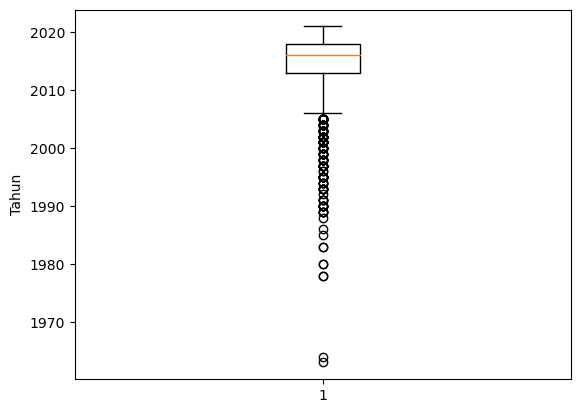

In [350]:
plt.boxplot(dft['Year'])
plt.ylabel('Tahun')
plt.show() # Memahami outlier tahun

Berdasarkan uji outlier dengan IQR dan boxplot terlihat ada outlier untuk data yang berada dibawah sekitar tahun 2005. Namun berdasarkan analisis yang dilakukan, tahun pembuatan mobil ini memang sesuai dengan data tipe dan merk mobil, sehingga ini bukan merupakan outlier perlu diubah datanya, melainkan bagian dari variasi data. 
Diputuskan hanya data mobil dibawah tahun 1990 yang akan dihapus. Hal ini karena ke 21 mobil yang ada dalam data tersebut dapat dikategorikan sebagai mobil antik. Dimana dalam mobil antik akan mempengaruhi harga dan membuat model menjadi tidak linear

In [351]:
dft = dft[dft['Year'] > 1990 ]  # Data yang digunakan setelah pembersihan outlier tahun

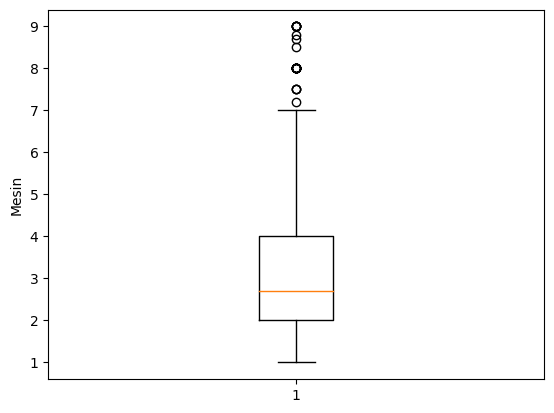

In [352]:
plt.boxplot(dft['Engine_Size'])
plt.ylabel('Mesin')
plt.show() # Memahami outlier ukuran mesin

In [353]:
dft.loc[dft['Engine_Size'] > 7, 'Engine_Size'] = dft['Engine_Size'] - 2      
# Handling outlier ukuran mesin

Pada kenyataanya, tidak ada mobil pribadi tanpa ada modifan yang menggunakan mesin lebih dari 7.0. Oleh karena itu, dalam handle outlier ini setiap ukuran mesin yang berada diatas 7.0 akan dikurangi dua agar menjadi ukuran mesin yang nyata.

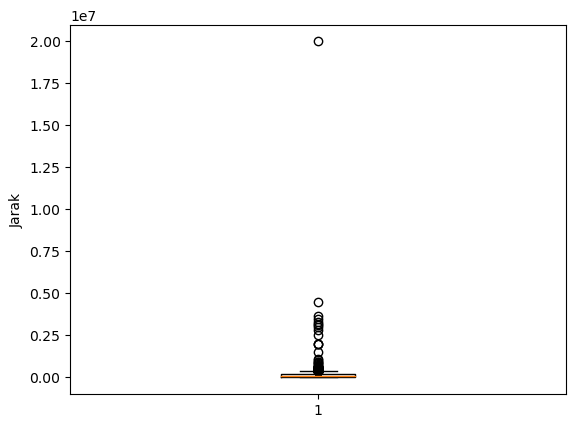

In [354]:
plt.boxplot(dft['Mileage'])
plt.ylabel('Jarak')
plt.show() # Memahami outlier jarak tempuh kendaraan karena pemakaian

Berdasarkan kondisi yang kenyataan, sangat jarang ada kendaraan dalam hal ini mobil pribadi yang mencapai jarak lebih dari 450ribu mil. Oleh karena itu, akan dihapus data yang lebih dari 350ribu mil.

In [355]:
dft = dft[dft['Mileage'] < 350000]

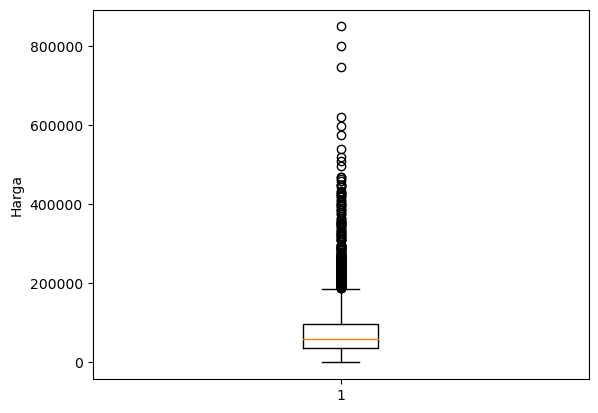

In [356]:
plt.boxplot(dft['Price'])
plt.ylabel('Harga')
plt.show() # Memahami outlier harga mobil

Untuk outlier harga akan tetap digunakan karena memang pada beberapa mobil yang dianggap mewah dan prestis akan memiliki harga yang lebih tinggi. Justru dengan data ini diharapkan model akan lebih bisa fitting untuk mempelajari data test yang mungkin muncul tidak hanya dari mobil biasa dan bukan mobil mewah.

### **4. Modelling** ###

In [357]:
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [358]:
dft['Name'] = dft['Make'] + ' ' + dft['Type']         # penambahan kolom nama/merk mobil

Penambahan kolom ini dilakukan karena pembuat mobil dan jenis mobilnya dapat menjadi satu fitur agar tidak overfitting. Dengan penyatuan ini juga lebih bisa menjelaskan pengaruhnya terhadap harga mobil.

Selanjutnya pada proses dibawah adalah penghapusan kolom type dan make yang sudah digabungkan menjadi kolom name. Kolom origin juga dihapus karena ada kolon region yang lebih relevan dalam menentukan harga. Kolom negotiable juga tidak lagi diperlukan sehingga dapat dihapus.

In [359]:
dft = dft.drop(columns=['Type', 'Make', 'Origin', 'Negotiable'])

In [444]:
transformer_1 = ColumnTransformer([('One Hot', OneHotEncoder(drop='first'), ['Options'])])
dft_encoded = pd.DataFrame(transformer_1.fit_transform(dft))
dft_encoded.columns = transformer_1.get_feature_names_out()
dft_encoded

,One Hot__Options_Semi Full,One Hot__Options_Standard
0,0.0,0.0
1,0.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,0.0
...,...,...
3600,0.0,0.0
3601,0.0,0.0
3602,0.0,1.0
3603,0.0,0.0


In [411]:
# Mengubah fitur kategorikal menjadi numerikal

transformer = ColumnTransformer([
    ('One Hot', OneHotEncoder(drop='first'), ['Gear_Type', 'Options']),
    ('Binary', ce.BinaryEncoder(), ['Region', 'Name'])
], remainder='passthrough')

Encoding dilakukan agar data kategorik dapat diprediksi dalam model regresi

In [412]:
# Memisahkan data independen variabel dengan target
X = dft.drop(['Price'], axis=1)
y = dft['Price']

In [414]:
# Splitting data training dan test dengan proporsi 90:10
# Meski dalam guiede modul 3 dikatakan ini hanya menjadi data training, namun untuk pengujian diputuskan tetap dibuat data tes sebanyak 10%
X_train, X_test, y_train, y_test= train_test_split(
    X,
    y,  
    test_size=0.1,
    random_state=1)

In [415]:
# Digunakan dari 5 Algoritma regresi
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=1)
rf = RandomForestRegressor(random_state=1)
xgb = XGBRegressor(random_state=1)

# Pemodelan dilakukan dalam skala logaritmik, namun kemudian di-inverse kembali untuk interpretasi
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

# Scaling data menggunakan standar scaler
scaler = StandardScaler()

# Kandidat algoritma
models = [log_lr, log_knn, log_dt, log_rf, log_xgb]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

# Mencari algoritma terbaik berdasarkan tiap metrics
for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=1)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

[-52386.94298242 -52710.68450239 -54938.93275696 -56253.86067844
 -56926.03734734] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())


[-28678.79938929 -30872.47290951 -31501.50105203 -30900.98863662
 -28520.20912909] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-0.99549242 -2.1931489  -0.85837673 -1.03138446 -0.84316133] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-52635.95050983 -39321.03416222 -49870.03604216 -50160.53403107
 -48657.11089535] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-29128.16036011 -23954.62749853 -29147.13148025 -28810.98483622
 -25687.71374708] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-0.93023381 -1.92152926 -0.9292927  -1.06348727 -0.79253878] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                  

In [416]:
# Evaluasi hasil dari 5 kandidat algoritma yang digunakan
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
})

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,Linear Regression,-54643.291654,1828.570145,-30094.794223,1242.410340,-1.184313,0.509786
1,KNN Regressor,-48128.933128,4589.773485,-27345.723584,2136.243015,-1.127416,0.406197
2,DecisionTree Regressor,-56089.994910,2445.943180,-29178.259118,763.210127,-1.305433,0.410597
3,RandomForest Regressor,-44671.250033,3246.456492,-22792.126899,954.326578,-0.990918,0.455004
4,XGBoost Regressor,-45035.466653,3181.877690,-23507.772391,969.620669,-0.890487,0.350850


In [417]:
models = {
    'XGB': XGBRegressor(random_state=1),
    'RandomForest': RandomForestRegressor(random_state=1)
}

score_rmse = []
score_mae = []
score_mape = []

# Prediksi pada test set
for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())
score_before_tuning

,RMSE,MAE,MAPE
XGB,37561.651390,20109.723311,558.738408
RandomForest,39697.872704,19849.851819,615.166542


In [419]:
# Kedalaman pohon
max_depth = list(np.arange(1, 11))

# Learning rate
learning_rate = list(np.arange(1, 100)/100)

# Jumlah pohon
n_estimators = list(np.arange(100, 201))

# Jumlah baris tiap pohon (% dari total baris train set)
subsample = list(np.arange(2, 10)/10)

# Gamma (min_impurity_decrease)
gamma = list(np.arange(1, 11)) # Semakin besar nilainya, semakin konservatif/simpel modelnya

# Jumlah feature yang digunakan untuk tiap pohon (% dari total kolom train set)
colsample_bytree = list(np.arange(1, 10)/10)

# Alpha (regularization)
reg_alpha = list(np.logspace(-3, 1, 10)) # Semakin besar nilainya, semakin konservatif/simpel modelnya


# Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha
}

In [421]:
# Benchmark model dengan hyperparameter tuning
xgb = XGBRegressor(random_state=1, verbosity=0)

# Membuat algorithm chains
estimator_xgb = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb, 
    param_distributions = hyperparam_space_xgb,
    n_iter = 50,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    random_state = 1  
)

In [422]:
# Fitting data training untuk mencari parameter terbaik
random_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('One '
                                                                               'Hot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['Gear_Type',
                                                                                'Options']),
                                                                              ('Binary',
                                                                               BinaryEncoder(),
                                                                               ['Region',
                                                                                'Name'])])),
                                             ('scaler', StandardScaler()),
                                             ('model',
                                              XGBRegressor(base_score=None,
                                                           boos...
                                                             0.007742636826811269,
                                                             0.021544346900318832,
                                                             0.05994842503189409,
                                                             0.1668100537200059,
                                                             0.46415888336127775,
                                                             1.2915496650148828,
                                                             3.593813663804626,
                                                             10.0],
                                        'model__subsample': [0.2, 0.3, 0.4, 0.5,
                                                             0.6, 0.7, 0.8,
                                                             0.9]},
                   random_state=1, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [423]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan RMSE, MAE & MAPE
pd.DataFrame(random_xgb.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__reg_alpha,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,param_model__gamma,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
7,0.860466,0.062303,0.051539,0.012799,0.9,0.059948,119,8,0.05,5,...,843.436211,1,-1.098628,-2.386435,-0.882000,-1.119046,-0.956405,-1.288503,0.556014,3
17,0.516582,0.086184,0.036696,0.006361,0.6,0.001,190,5,0.04,9,...,1007.428651,2,-1.045200,-2.409953,-0.850722,-1.138354,-0.975972,-1.284040,0.570722,2
20,0.311271,0.043991,0.033117,0.007518,0.9,0.007743,143,4,0.38,6,...,1312.471470,3,-1.148790,-2.428359,-0.756571,-1.088355,-0.966236,-1.277662,0.590774,1
8,0.591764,0.073065,0.066668,0.022757,0.7,0.021544,182,6,0.31,2,...,625.531723,4,-1.146165,-2.451672,-0.913214,-1.136767,-1.044374,-1.338438,0.562889,4
22,0.317379,0.051059,0.033349,0.008013,0.7,0.002783,155,4,0.25,8,...,1417.888083,8,-1.123650,-2.625326,-0.811600,-1.167414,-0.982871,-1.342172,0.653511,5


In [424]:
# Cek skor dan params terbaik
print('XGBoost')
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

XGBoost
Best_score: -39905.204329552435
Best_params: {'model__subsample': 0.9, 'model__reg_alpha': 0.05994842503189409, 'model__n_estimators': 119, 'model__max_depth': 8, 'model__learning_rate': 0.05, 'model__gamma': 5, 'model__colsample_bytree': 0.8}


In [425]:
# Model XGBoost
model = {'XGB': XGBRegressor(random_state=1)}

# Define model terhadap estimator terbaik
xgb_tuning = random_xgb.best_estimator_

# Fitting model
xgb_tuning.fit(X_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)

score_after_tuning = pd.DataFrame({'RMSE': rmse_xgb_tuning, 'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning}, index=model.keys())
score_after_tuning

,RMSE,MAE,MAPE
XGB,38967.252087,18772.55027,655.264519


In [426]:
# Sebelum hyperparameter tuning
pd.DataFrame(score_before_tuning.loc['XGB']).T

,RMSE,MAE,MAPE
XGB,37561.65139,20109.723311,558.738408


In [427]:
# Setelah hyperparameter tuning
score_after_tuning

,RMSE,MAE,MAPE
XGB,38967.252087,18772.55027,655.264519


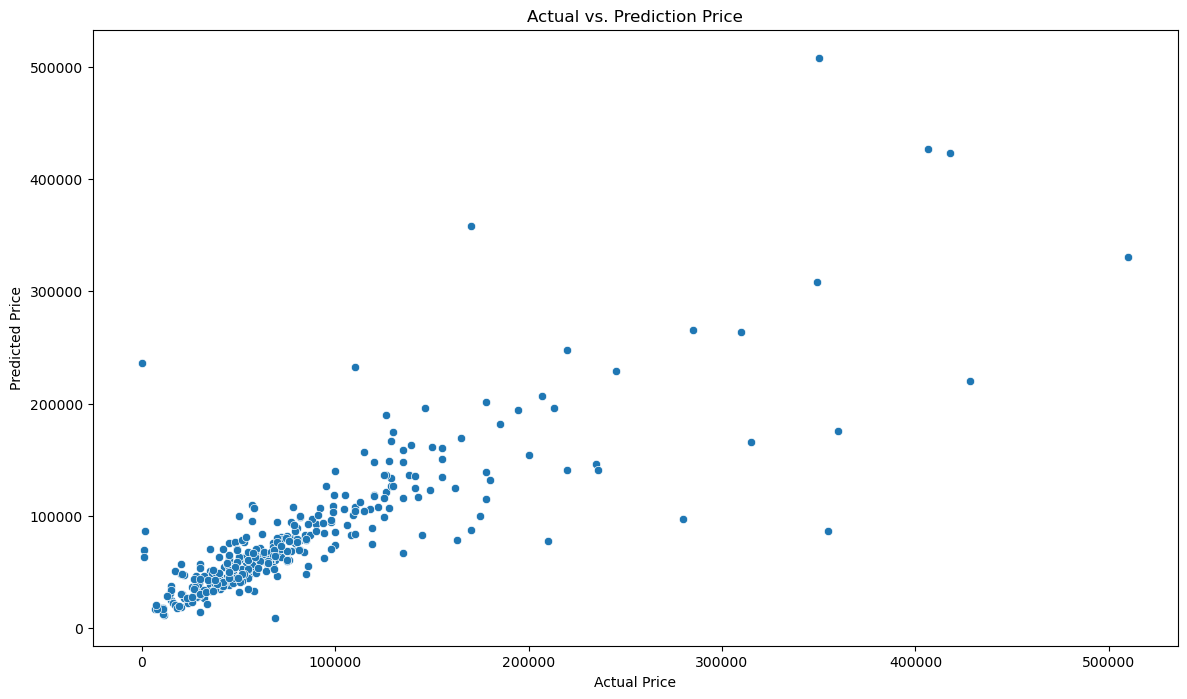

In [428]:
plt.figure(figsize=(14, 8))
plot = sns.scatterplot(x=y_test, y=y_pred_xgb_tuning).set(title='Actual vs. Prediction Price', 
                                               xlabel='Actual Price', 
                                               ylabel='Predicted Price');

# *Batas Progres* #